In [85]:
import sys
import os
from builtins import print
import numpy as np
import scipy.io.wavfile as wav
from python_speech_features import mfcc
from python_speech_features import logfbank
from scipy.cluster.vq import kmeans2, whiten, vq
import pandas as pd
import csv
import array
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import LabelEncoder



training_data_dir = r"C:/Users/prateek/Desktop/winter 2019/Degree Project/mcsvm/Sorted Drum Data/Filtered Instrument"
feature_file = training_data_dir + " features" + ".csv"
classify_file = training_data_dir + " classify" + ".csv"


In [86]:
classify = []
features = np.array([])
min = []
max = []
mean = []
std = []
full_feature = []
temp = []


for root, dirs, files in os.walk(training_data_dir):
    for file in files:
        if file.endswith('.wav'):
            full_path = os.path.join(root,file)
            (rate, sig) = wav.read(full_path)
            mfcc_feat = mfcc(sig, rate,)  #get mfcc
            fbank_feat = logfbank(sig, rate, nfilt=13) #get filterbank energies
            folder_name = os.path.basename(os.path.dirname(full_path))
            classify.append(folder_name)
            min = (np.c_[mfcc_feat.min(0), fbank_feat.min(0)])
            max = (np.c_[mfcc_feat.max(0), fbank_feat.max(0)])
            mean = (np.c_[mfcc_feat.mean(0), fbank_feat.mean(0)])
            std = (np.c_[mfcc_feat.std(0), fbank_feat.std(0)])
            temp = np.copy((np.c_[min, max]))
            features = (np.c_[temp,mean])
            features = (np.c_[features,std])
            temp = features.flatten().tolist()
            temp.append(folder_name)
            full_feature.append(temp)

In [87]:
full_feature = full_feature
with open(feature_file, 'w', newline='') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(full_feature)

In [88]:

data = pd.read_csv(feature_file, header=None)

data.shape
data.dtypes

data.head()

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,12.764756,1.366251,21.825375,14.957868,16.292992,7.840784,3.331972,4.860408,-33.563683,0.472500,...,3.635844,2.040984,11.832314,20.506943,19.853915,9.812443,14.753609,4.612275,2.923141,Agogo
1,12.774140,0.780403,22.954388,13.917545,15.310119,5.882645,3.487840,4.616199,-37.013803,0.434531,...,5.089194,4.714063,11.837002,27.022350,19.683653,13.870973,13.753422,5.080275,2.714728,Agogo
2,17.122570,6.207347,22.455103,15.056370,19.799094,11.078998,1.425225,2.568404,-29.447540,6.860197,...,1.455651,-4.691539,12.683060,16.957806,18.671859,3.406067,15.539655,5.264955,1.715406,Agogo
3,15.598028,6.304872,22.922414,14.465183,19.114958,10.547173,1.884133,1.843809,-27.773303,9.243660,...,1.991512,-17.300249,12.415925,9.338115,18.244577,-4.341567,15.542556,5.827329,1.459422,Agogo
4,14.812306,3.325541,22.542506,13.164859,18.475739,7.443019,2.216481,2.540613,-42.365674,4.318660,...,3.950550,-59.204613,5.990316,-22.174736,19.660811,-38.373144,11.607392,9.640765,4.391178,Agogo


In [89]:

y=data.iloc[:, 104]
x = data.drop(columns=104)

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()

#  I changed this line
y = labelencoder_X.fit_transform(y)

print(y)
print(x)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4]
           0          1          2          3          4          5    \
0    12.764756   1.366251  21.825375  14.957868  16.292992   7.840784   
1    12.774140   0.780403  22.954388  13.917545  15.310119   5.882645   
2    17.122570   6.207347  22.455103  15.056370  19.799094  11.078998   
3    15.598028   6.304872  22.922414  14.465183  19.114958  10.547173   
4    14.812306   3.325541  22.542506  13.164859  18.475739   7.443019   
5    14.408814 

In [90]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn import svm
import pandas as pd

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

x_train.shape
y_train.shape
x_test.shape
y_test.shape


lin_clf = svm.LinearSVC()
lin_clf.fit(x_train,y_train)
classifier = LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100000000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

#dec = lin_clf.decision_function([[1]])
#dec.shape[1]
y_score = classifier.fit(x_train, y_train).decision_function(x_test)
#print(y_score)
lin_clf.score(x_test,y_test)



C:\Users\prateek\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9444444444444444

0.9259259259259259
0.8964285714285716
['Agogo' 'Bass' 'Bell' 'Bongo' 'Clap']
Confusion matrix, without normalization
[[ 5  0  0  0  0]
 [ 1 14  0  0  0]
 [ 1  0  1  0  0]
 [ 0  0  0  6  0]
 [ 1  0  0  1 24]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.  ]
 [0.07 0.93 0.   0.   0.  ]
 [0.5  0.   0.5  0.   0.  ]
 [0.   0.   0.   1.   0.  ]
 [0.04 0.   0.   0.04 0.92]]


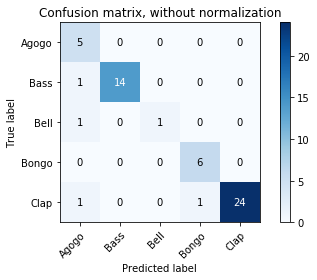

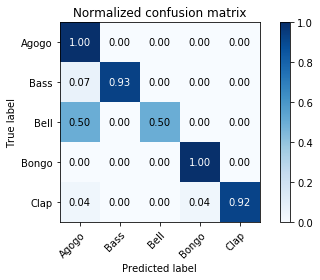

In [100]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

y_pred = classifier.fit(x_train, y_train).predict(x_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred, average = 'macro')

print(accuracy)
print(precision)

cm = confusion_matrix(y_test, y_pred)

class_names = data.iloc[:, 104]
class_names = pd.Series(class_names).unique()
print(class_names)


    
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.savefig('nonnormcmatrix.png')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

#plt.show()  //print the plot

plt.savefig('normcmatrix.png')


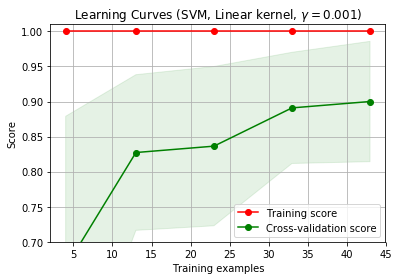

In [108]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC



def plot_learning_curve(estimator, title, x1, y1, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x1, y1, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (SVM, Linear kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = SVC(kernel="linear",gamma=0.001)
plot_learning_curve(classifier, title, x_test, y_test, (0.7, 1.01), cv=cv, n_jobs=4)

#plt.show()
plt.savefig('crossValidation.png')
